In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=None).to(device)
model.fc = nn.Sequential(
               nn.Linear(512, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load("/content/drive/MyDrive/machine learning projects/monkey pox/weight/resnet(18).h5"), strict=False) #모델 저장 위치 바꾸기 여기서 resnet(18, 50, 101)구분 잘하기

<All keys matched successfully>

In [ ]:
import os
test_file= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/monkeypox") #/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/monkeypox 여기다가 테스트 폴더 위치 변경 이거 데이터셋임
print(test_file)
classes = ['others', 'monkeypox']
print(classes)
#이건 테스트할 테스트 데이터 셋인데 저장해둔 사진 파일 위치 올려놓기

['monkeypox103.png', 'monkeypox102.png', 'monkeypox109.png', 'monkeypox13.png', 'monkeypox126.png', 'monkeypox122.png', 'monkeypox116.png', 'monkeypox119.png', 'monkeypox114.png', 'monkeypox169.png', 'monkeypox142.png', 'monkeypox154.png', 'monkeypox182.png', 'monkeypox183.png', 'monkeypox187.png', 'monkeypox212.png', 'monkeypox199.png', 'monkeypox20.png', 'monkeypox208.png', 'monkeypox22.png', 'monkeypox2.png', 'monkeypox217.png', 'monkeypox219.png', 'monkeypox21.png', 'monkeypox226.png', 'monkeypox234.png', 'monkeypox266.png', 'monkeypox255.png', 'monkeypox257.png', 'monkeypox262.png', 'monkeypox263.png', 'monkeypox3.png', 'monkeypox52.png', 'monkeypox42.png', 'monkeypox76.png', 'monkeypox61.png', 'monkeypox80.png', 'monkeypox60.png', 'monkeypox83.png', 'monkeypox79.png', 'monkeypox74.png', 'monkeypox59.png', 'monkeypox73.png', 'monkeypox6.png', 'monkeypox58.png', 'monkeypox99.png', 'monkeypox85.png', 'monkeypox88.png', 'mo_0007.jpg', 'mo_0013.jpg', 'mo_0068.jpg', 'mo_0061.jpg', 'mo_

In [ ]:
file_list = [Image.open( "/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/monkeypox/" + img_path) for img_path in test_file]
print(file_list)
#위에 문장에서 파일명을 받았으니 파일명과 나머지 주소를 합치는 과정

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043BC490>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62018E5590>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043DF950>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043BC350>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7E50>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043BC8D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7890>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7E10>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7C90>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043DE9D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7190>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F62043D7A10>, <PIL.PngImagePlugin.PngImag

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}
#이미지 전처리 과정인데 여기서 'test' 부분으로 test데이터셋 resize해서 이미지 크기 평준화 시키는곳

In [ ]:
validation_batch1 = torch.stack([data_transforms['test'](img).to(device)
                                for img in file_list])

#이건 내가 위에꺼가 원숭이두창, 나머지로 원숭이두창, 나머지의 결과가 어떻게 나오나 보려고 나눠둔것 validation_batch한개만 있어도 상관 없음

In [ ]:
pred_logits_tensor = model(validation_batch1)
pred_logits_tensor


tensor([[-1.6026,  1.6715],
        [-0.0604,  0.2671],
        [ 1.5862, -1.5848],
        [-0.2637,  0.2601],
        [-3.1638,  2.0412],
        [-0.1035, -0.6349],
        [-3.2035,  2.7092],
        [ 0.1595, -0.4009],
        [-1.0734,  0.5820],
        [ 2.4723, -1.9747],
        [-1.6340,  1.0359],
        [-4.0621,  2.9963],
        [-1.7002,  1.6653],
        [-1.3445,  1.2558],
        [ 0.6259, -0.2510],
        [-1.3067,  1.1867],
        [-2.1667,  1.5185],
        [-5.4808,  4.7662],
        [-4.8620,  4.4784],
        [-0.8249,  0.4872],
        [-2.9810,  2.7848],
        [ 1.3270, -1.8008],
        [-4.1641,  4.0764],
        [ 1.9219, -1.6193],
        [ 1.4000, -1.2865],
        [ 0.7372, -0.6840],
        [-4.2233,  3.0224],
        [-1.2356,  1.0610],
        [-2.5246,  2.2854],
        [ 0.9313, -0.8635],
        [-1.6928,  1.7039],
        [-0.6923,  0.4732],
        [ 0.4593, -0.4514],
        [-0.5396,  0.2995],
        [-1.1930,  1.0468],
        [-1.3169,  1

In [ ]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs
#여기다가 100곱하면 %나옴

array([[3.6470361e-02, 9.6352971e-01],
       [4.1886148e-01, 5.8113855e-01],
       [9.5972985e-01, 4.0270183e-02],
       [3.7195942e-01, 6.2804061e-01],
       [5.4590032e-03, 9.9454099e-01],
       [6.2982738e-01, 3.7017265e-01],
       [2.6976550e-03, 9.9730229e-01],
       [6.3652527e-01, 3.6347473e-01],
       [1.6037895e-01, 8.3962107e-01],
       [9.8842257e-01, 1.1577428e-02],
       [6.4772896e-02, 9.3522704e-01],
       [8.5941062e-04, 9.9914062e-01],
       [3.3392757e-02, 9.6660721e-01],
       [6.9115236e-02, 9.3088484e-01],
       [7.0618099e-01, 2.9381898e-01],
       [7.6321043e-02, 9.2367893e-01],
       [2.4477409e-02, 9.7552252e-01],
       [3.5460827e-05, 9.9996459e-01],
       [8.7800981e-05, 9.9991214e-01],
       [2.1214341e-01, 7.8785652e-01],
       [3.1233486e-03, 9.9687660e-01],
       [9.5802492e-01, 4.1975021e-02],
       [2.6368070e-04, 9.9973637e-01],
       [9.7183651e-01, 2.8163478e-02],
       [9.3622845e-01, 6.3771494e-02],
       [8.0552286e-01, 1.

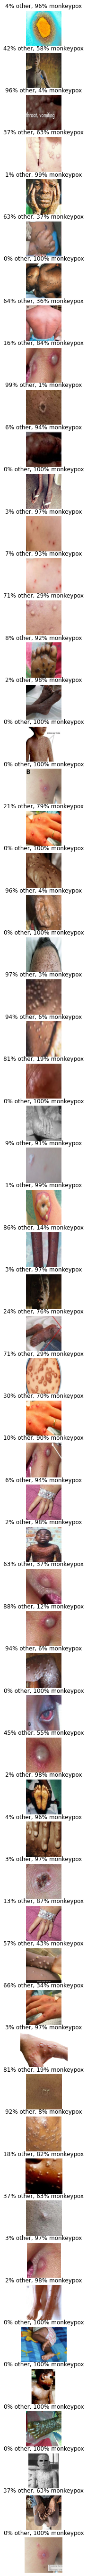

In [ ]:
fig, axs = plt.subplots(len(file_list), 1, figsize=(150, 100))
for i, img in enumerate(file_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% other, {:.0f}% monkeypox".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1])) #확률 100곱해주는 문장
    ax.imshow(img)